In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/7282_1.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv


In [3]:
df = pd.read_csv("/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv")
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.611260,...,2016-03-23T00:00:00Z,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,GA,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.729390,...,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,MA,Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,702 W Appleway Ave,"Hotel,Hotel, Motel, and Buildi

In [4]:
df = df[["id", "reviews.rating", "reviews.title", "reviews.text"]]
df

,id,reviews.rating,reviews.title,reviews.text
0,AVwc252WIN2L1WUfpqLP,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...
2,AVwc252WIN2L1WUfpqLP,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...
3,AVwdOclqIN2L1WUfti38,2.0,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,Picture Window Ocean View!,It is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,"Clean, comfortable and quiet","I live close by, and needed to stay somewhere ..."
9997,AVwd1TbkByjofQCxs6FH,4.0,Passing through,Rolled in 11:30 laid out heads down woke up to...
9998,AVwdHbizIN2L1WUfsXto,1.0,Terrible,Absolutely terrible..I was told I was being gi...


In [5]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [6]:
df

,id,reviews.rating,reviews.title,reviews.text
0,AVwc252WIN2L1WUfpqLP,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...
2,AVwc252WIN2L1WUfpqLP,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...
3,AVwdOclqIN2L1WUfti38,2.0,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,Picture Window Ocean View!,It is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,"Clean, comfortable and quiet","I live close by, and needed to stay somewhere ..."
9997,AVwd1TbkByjofQCxs6FH,4.0,Passing through,Rolled in 11:30 laid out heads down woke up to...
9998,AVwdHbizIN2L1WUfsXto,1.0,Terrible,Absolutely terrible..I was told I was being gi...


In [7]:
df

,id,reviews.rating,reviews.title,reviews.text
0,AVwc252WIN2L1WUfpqLP,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...
2,AVwc252WIN2L1WUfpqLP,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...
3,AVwdOclqIN2L1WUfti38,2.0,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,Picture Window Ocean View!,It is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,"Clean, comfortable and quiet","I live close by, and needed to stay somewhere ..."
9997,AVwd1TbkByjofQCxs6FH,4.0,Passing through,Rolled in 11:30 laid out heads down woke up to...
9998,AVwdHbizIN2L1WUfsXto,1.0,Terrible,Absolutely terrible..I was told I was being gi...


In [8]:
df.columns = ["id", "rating", "title", "text"]

df = df[(df.title.isna() == False) & (df.text.isna() == False)]

In [9]:

df_cleaned = df
df_cleaned.title = df_cleaned.title.apply(round1)
df_cleaned.text = df_cleaned.text.apply(round1)
df_cleaned

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,rating,title,text
0,AVwc252WIN2L1WUfpqLP,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...
2,AVwc252WIN2L1WUfpqLP,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...
3,AVwdOclqIN2L1WUfti38,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,always great stay,i live in md and the aloft is my home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...
9997,AVwd1TbkByjofQCxs6FH,4.0,passing through,rolled in laid out heads down woke up to cont...
9998,AVwdHbizIN2L1WUfsXto,1.0,terrible,absolutely terriblei was told i was being give...


In [10]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_cleaned.text)
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_dtm.index = data_clean.index
# data_dtm
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [11]:
data_dtm.iloc[:,3:5].sum()

aaron    1
aarp     4
dtype: int64

In [12]:
data = data_dtm
summed = data.sum().reset_index()
summed.columns = ["word", "ct"]
top_dict = {}
for idx, row in summed.iterrows():
    top_dict[row.word] = row.ct
#     print(row.ct)
#     break
#     top = data[c].sort_values(ascending=False).head(30)
#     top_dict[c]= list(zip(top.index, top.values))

words = sorted(top_dict.items(), key=lambda x: x[1], reverse=True)

In [13]:
words[:20]

[('hotel', 6621),
 ('room', 6518),
 ('staff', 3988),
 ('stay', 3728),
 ('good', 3477),
 ('great', 3473),
 ('clean', 3315),
 ('breakfast', 2893),
 ('nice', 2781),
 ('rooms', 2276),
 ('friendly', 2091),
 ('location', 1990),
 ('stayed', 1761),
 ('comfortable', 1691),
 ('time', 1416),
 ('place', 1382),
 ('night', 1363),
 ('service', 1359),
 ('area', 1357),
 ('helpful', 1306)]

In [14]:
# # If more than half of the comedians have it as a top word, exclude it from the list
# add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
# add_stop_words

In [15]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
# data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(["stay", "hotel", "room"])

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data[["title", "text"]])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_stop.index = data_clean.index
data_cv


<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [16]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [17]:
df_cleaned

,id,rating,title,text
0,AVwc252WIN2L1WUfpqLP,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...
2,AVwc252WIN2L1WUfpqLP,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...
3,AVwdOclqIN2L1WUfti38,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,always great stay,i live in md and the aloft is my home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...
9997,AVwd1TbkByjofQCxs6FH,4.0,passing through,rolled in laid out heads down woke up to cont...
9998,AVwdHbizIN2L1WUfsXto,1.0,terrible,absolutely terriblei was told i was being give...


In [18]:
df_cleaned

,id,rating,title,text
0,AVwc252WIN2L1WUfpqLP,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...
2,AVwc252WIN2L1WUfpqLP,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...
3,AVwdOclqIN2L1WUfti38,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,always great stay,i live in md and the aloft is my home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...
9997,AVwd1TbkByjofQCxs6FH,4.0,passing through,rolled in laid out heads down woke up to cont...
9998,AVwdHbizIN2L1WUfsXto,1.0,terrible,absolutely terriblei was told i was being give...


In [19]:
'asdfasfd' + 'asdfsadf'

'asdfasfdasdfsadf'

In [20]:
title = '' 
text = ''
for idx, row in df_cleaned.iterrows():
    title += f" {row.title}"
    text += f" {row.text}"

In [21]:
title_cleaned = []
for x in title.split():
    if x not in stop_words:
        title_cleaned.append(x)
title_cleaned = " ".join(title_cleaned)

In [22]:
text_cleaned = []
for x in text.split():
    if x not in stop_words:
        text_cleaned.append(x)
text_cleaned = " ".join(text_cleaned)

(-0.5, 399.5, 199.5, -0.5)

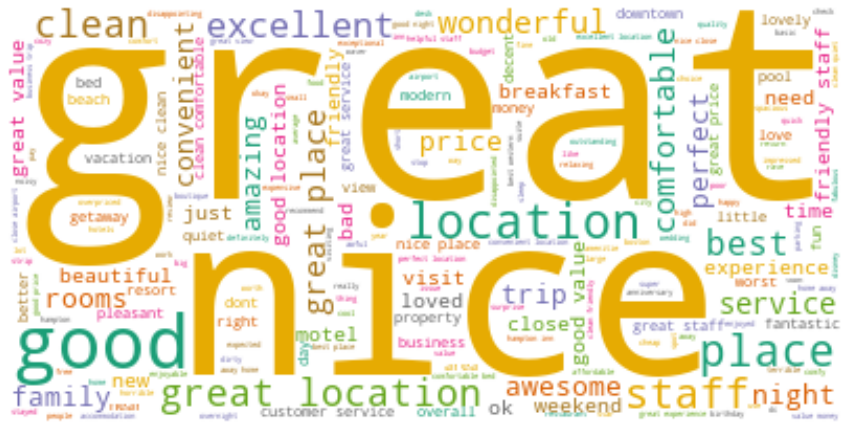

In [23]:
# Reset the output dimensions
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
wc.generate(title_cleaned)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.title(full_names[index])

(-0.5, 399.5, 199.5, -0.5)

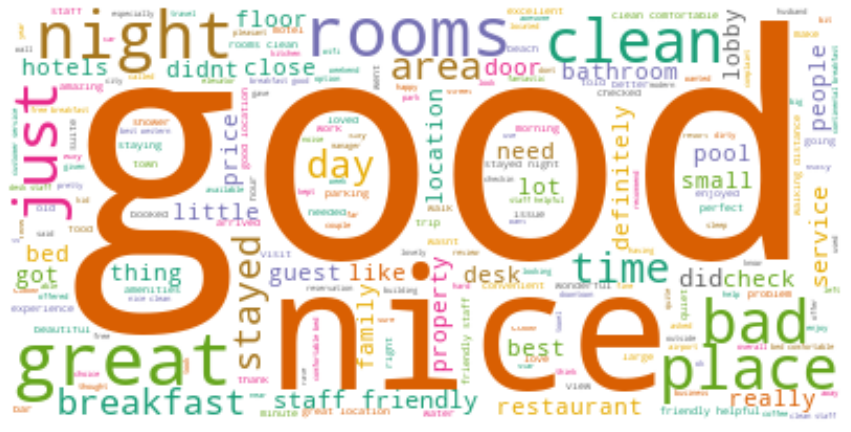

In [24]:
# Reset the output dimensions
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
wc.generate(text_cleaned)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.title(full_names[index])

In [25]:
df

,id,rating,title,text
0,AVwc252WIN2L1WUfpqLP,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...
1,AVwc252WIN2L1WUfpqLP,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...
2,AVwc252WIN2L1WUfpqLP,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...
3,AVwdOclqIN2L1WUfti38,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...
4,AVwdOclqIN2L1WUfti38,5.0,always great stay,i live in md and the aloft is my home away fro...
...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...
9997,AVwd1TbkByjofQCxs6FH,4.0,passing through,rolled in laid out heads down woke up to cont...
9998,AVwdHbizIN2L1WUfsXto,1.0,terrible,absolutely terriblei was told i was being give...


In [28]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['title_polarity'] = df['title'].apply(pol)
df['title_subjectivity'] = df['title'].apply(sub)

df['text_polarity'] = df['text'].apply(pol)
df['text_subjectivity'] = df['text'].apply(sub)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,id,rating,title,text,text_polarity,text_subjectivity,title_polarity,title_subjectivity
0,AVwc252WIN2L1WUfpqLP,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...,0.589286,0.642857,0.500000,0.400000
1,AVwc252WIN2L1WUfpqLP,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...,0.375000,0.531250,0.350000,0.650000
2,AVwc252WIN2L1WUfpqLP,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...,0.488889,0.538889,0.600000,0.900000
3,AVwdOclqIN2L1WUfti38,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...,-0.125000,0.325000,0.000000,0.000000
4,AVwdOclqIN2L1WUfti38,5.0,always great stay,i live in md and the aloft is my home away fro...,0.284787,0.531633,0.800000,0.750000
...,...,...,...,...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...,0.179500,0.574167,0.000000,0.000000
9996,AVwdRp4DIN2L1WUfuGZZ,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...,0.281639,0.537121,0.255556,0.611111
9997,AVwd1TbkByjofQCxs6FH,4.0,passing through,rolled in laid out heads down woke up to cont...,0.382063,0.755556,0.000000,0.000000
9998,AVwdHbizIN2L1WUfsXto,1.0,terrible,absolutely terriblei was told i was being give...,0.080000,0.400000,-1.000000,1.000000


In [34]:
df[df.text_polarity < .1]

,id,rating,title,text,text_polarity,text_subjectivity,title_polarity,title_subjectivity
3,AVwdOclqIN2L1WUfti38,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...,-0.125000,0.325000,0.0,0.0
8,AVwdOclqIN2L1WUfti38,5.0,short stay for business,i travel a lot with my job so im constantly st...,0.057143,0.371429,0.0,0.3
30,AWE7dKHFIxWefVJwyLgA,2.0,hampton inn,heat in room did not work properly tv remote w...,-0.250000,0.533333,0.0,0.0
31,AWE7dKHFIxWefVJwyLgA,5.0,gracious and helpful staff,even though we were having problems ie feather...,-0.012500,0.562500,0.0,0.0
45,AWE7dKHFIxWefVJwyLgA,3.0,tv sucks,i was really disappointed with the tv service ...,-0.470000,0.493333,-0.3,0.3
...,...,...,...,...,...,...,...,...
9982,AWCACesxIxWefVJwvFDm,4.0,stayed one night,booked the hotel during july weekend because ...,0.091667,0.317857,0.0,0.0
9983,AWCACesxIxWefVJwvFDm,1.0,broken shower,room had a bad smell and shower did not work r...,-0.161111,0.722222,-0.4,0.4
9986,AWCACesxIxWefVJwvFDm,1.0,beware do yourself a favor dont stop here,i wish i could give this hotel zero stars pro ...,-0.044444,0.655556,0.0,0.0
9998,AVwdHbizIN2L1WUfsXto,1.0,terrible,absolutely terriblei was told i was being give...,0.080000,0.400000,-1.0,1.0
